# Laboratoire 2 : les équations différentielles d'ordre 2
## GCH-MAT217, Automne 2020, V.Charette

L'objectif de ce laboratoire est de regarder un peu comment résoudre des équations différentielles d'ordre 2 avec python.

On a deux grandes catégories d'outils : les outils symboliques, nous permettant de trouver des solutions de type "analytique", et les outils numériques, lorsque les solutions analytiques n'existent pas ou sont au-delà des méthodes habituelles de résolution d'EDOs.

Commençons par les outils symboliques.  Plus précisément, nous allons regarder un peu ce qu'on peut faire avec la bibliothèque sympy.

## A. Résolution symbolique

Lorsqu'on travaille avec sympy, il faut déclarer les symboles qu'on va utiliser.

J'ai inclus ici quelques commandes, pour montrer un peu comment se comportent les symboles.

In [6]:
from sympy import *

x,t=symbols('x t')

In [7]:
x

x

In [8]:
x+1,x+t

(x + 1, t + x)

In [9]:
x.subs(x,1)+1

2

In [10]:
x

x

In [11]:
solve(x**2-1)

[-1, 1]

In [12]:
solve(x**2+1)

[-I, I]

Nous avons déjà vu la commande dsolve pour résoudre une équation différentielle d'ordre 1. Ici "y(x).diff(x)" signifie qu'on prend la dérivée une fois par rapport à x.  (C'est une syntaxe de type "orienté-objet".)

In [13]:
y=symbols('y',cls=Function)

# résoudre y'-2y=0 
dsolve(y(x).diff(x)-2*y(x),y(x))

Eq(y(x), C1*exp(2*x))

Remarquez la structure : dsolve(expr, f(x)).  Ici, "expr" signifie "expr=0".

Alternativement, on pourrait fournir à dsolve une équation à résoudre.  Il faut alors utiliser Eq.

In [4]:
# résoudre y'= 2y 
dsolve(Eq(y(x).diff(x),2*y(x)),y(x))

Eq(y(x), C1*exp(2*x))

On peut aussi mettre des conditions initiales.  (Je ne suis pas certaine que ça marche dans toutes les situations, par contre, par exemple si l'équation à résoudre admet une solution compliquée.)

In [14]:
# résoudre y'-2y=0, y(0)=2 
dsolve(Eq(y(x).diff(x),2*y(x)),y(x),ics={y(0):2})

Eq(y(x), 2*exp(2*x))

On peut aussi s'en servir pour les équations d'ordre 2.  Pour prendre la dérivée seconde, la syntaxe est :

In [15]:
y(x).diff(x,x)

Derivative(y(x), (x, 2))

Par exemple, résolvons : 
$$\frac{d^2 y}{dx^2}-2\frac{d y}{dx}+3y=0$$

In [16]:
dsolve(y(x).diff(x,x)-2*y(x).diff(x)+3*y(x),y(x))

Eq(y(x), (C1*sin(sqrt(2)*x) + C2*cos(sqrt(2)*x))*exp(x))

Ici aussi, on peut mettre des conditions initiales.

In [8]:
# résoudre y''-2y=0, y(0)=2 , y'(0)=3
dsolve(y(x).diff(x,x)-2*y(x).diff(x)+3*y(x),y(x),ics={y(0):2,y(x).diff(x).subs(x,0):3})

Eq(y(x), (sqrt(2)*sin(sqrt(2)*x)/2 + 2*cos(sqrt(2)*x))*exp(x))

## Exercice 1.  Utilisez dsolve pour résoudre les équations différentielles suivantes :

a) $\frac{d^2y}{dx^2}+2\frac{dy}{dx}-y=x$, $y(0)=1$, $y'(0)=2$

b) $\frac{d^2y}{dx^2}+x\frac{dy}{dx}=0$, $y(0)=7$, $y'(0)=5$

c) $\frac{d^2y}{dx^2}+x\frac{dy}{dx}-y=0$

(Remarque : pour c), sympy va tenter de donner une solution sous forme de série.)

In [17]:
dsolve(y(x).diff(x,x)+2*y(x).diff(x)-y(x)-x,y(x),ics={y(0):1,y(x).diff(x).subs(x,0):2})

Eq(y(x), -x + (3/2 + 3*sqrt(2)/2)*exp(x*(-1 + sqrt(2))) + (3/2 - 3*sqrt(2)/2)*exp(x*(-sqrt(2) - 1)) - 2)

In [18]:
dsolve(y(x).diff(x,x)+x*y(x).diff(x),y(x),ics={y(0):7,y(x).diff(x).subs(x,0):5})

Eq(y(x), 5*sqrt(2)*sqrt(pi)*erf(sqrt(2)*x/2)/2 + 7)

In [19]:
dsolve(y(x).diff(x,x)+x*y(x).diff(x)-y(x),y(x))

Eq(y(x), C2*(-x**4/24 + x**2/2 + 1) + C1*x + O(x**6))

Si on veut tracer le graphe du résultat, sympy a une fonction plot.

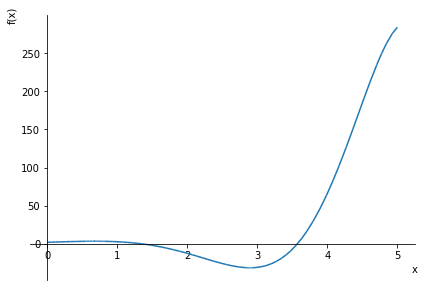

In [20]:
sol=dsolve(y(x).diff(x,x)-2*y(x).diff(x)+3*y(x),y(x),ics={y(0):2,y(x).diff(x).subs(x,0):3})

plot(sol.rhs,(x,0,5))

## Exercice 2.  Tracez les graphes de chacune des solutions de l'exercice 1a) et 1b).

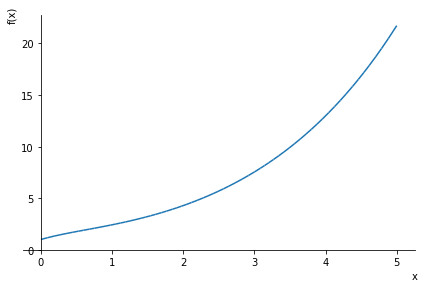

In [21]:
sol1=dsolve(y(x).diff(x,x)+2*y(x).diff(x)-y(x)-x,y(x),ics={y(0):1,y(x).diff(x).subs(x,0):2})
plot(sol1.rhs,(x,0,5))

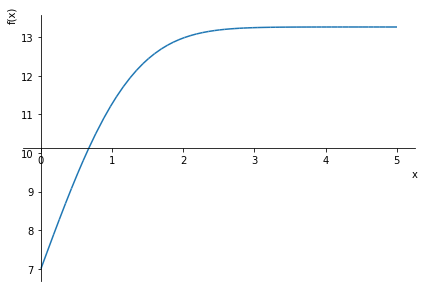

In [22]:
sol2=dsolve(y(x).diff(x,x)+x*y(x).diff(x),y(x),ics={y(0):7,y(x).diff(x).subs(x,0):5})
plot(sol2.rhs,(x,0,5))

## B. Résolution numérique

Quand trouver une solution analytique est au-delà de nos forces -- à nous et à sympy -- on doit recourir à une solution numérique.

À la base, les solveurs numériques travaillent avec un système de la forme suivante : 
$$\frac{dy}{dx}=f(x,y), \quad y(x0)=y0$$
Autrement dit, une équation différentielle du premier ordre avec condition initiale.  Grosso modo, le solveur numérique va "suivre la direction tangente", direction donnée par $f(x,y)$, sur de petits intervalles de $x$ : de $x=x_0$ on se rend à la position $x=x_1$ en suivant la direction tangente, on reprend avec la direction tangente pour se déplacer de $x=x_1$ à $x=x_2$, etc. 

(Une des difficultés est de décider de la longueur des intervalles de $x$, pour obtenir une solution suffisamment proche de la bonne solution, qui est inconnue.)

Nous on va aussi vouloir tracer le graphe de la solution numérique.  Donc on importe les bibliothèques numpy et pyplot. On va aussi importer la commande pour résoudre numériquement un ED à condition initiale.

In [23]:
# je réinitialise x,y,z, au cas où ils serviraient de nouveau...
del x
del y
del z

NameError: name 'z' is not defined

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

Afin d'apprivoiser la syntaxe, considérons l'exemple suivant.

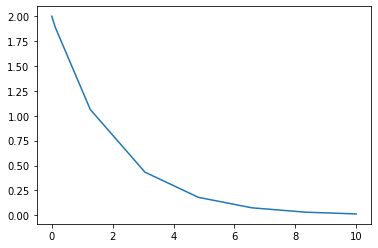

In [25]:
def exponential_decay(t, y): return -0.5 * y

sol = solve_ivp(exponential_decay, [0, 10], [2])

plt.plot(sol.t,sol.y[0])

 la syntaxe pour solve_ivp est : solve_ivp(f(t,y),[t0,tf],[y0]) où :
 
 1- f(t,y) est une fonction "appelable" : par exemple, f peut être une fonction définie par un module ("def")
 
 2- t0 est la valeur initiale de la variable indépendante t
 
 3- tf est la valeur de t où l'on souhaite estimer la valeur de y(tf)
 
 4- y0=y(t0)
 
 La valeur retournée sol contient plusieurs éléments : sol.t retourne les valeurs où la fonction a été approximée et sol.y retourne les valeurs à ces points.
 
 Alternative : solve_ivp(f(t,y),[t0,tf],[y0],dense_output=True)
 Le dernier argument est optionnel, mais deviendra nécessaire plus loin.
 

In [26]:
sol.t


array([ 0.        ,  0.11488132,  1.26369452,  3.06074656,  4.81637262,
        6.57504937,  8.33467262, 10.        ])

In [27]:
sol.y

array([[2.        , 1.88835583, 1.0632438 , 0.43316531, 0.18014905,
        0.07480841, 0.03105019, 0.01350782]])

Remarquez que sol.y est en fait une matrice, ayant autant de rangées que la dimension du système à résoudre.  Dans le cas d'une seule ED, il y a une seule rangée mais c'est pour cette raison qu'on prend sol.y[0] plutôt que sol.y dans les entrées pour plt.plot.

Si vous trouvez comme moi que ça manque de points, on peut spécifier à quels points de l'intervalle [t0,tf] on doit évaluer.

In [28]:
sol = solve_ivp(exponential_decay, [0, 10], [2], t_eval=np.arange(0, 10, 0.1))

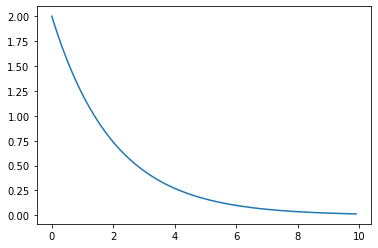

In [29]:
plt.plot(sol.t,sol.y[0])

Quoi? solve_ivp prend des systèmes? ben oui...

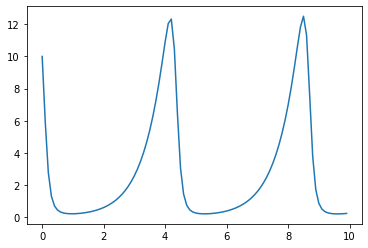

In [30]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol1 = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),t_eval=np.arange(0, 10, 0.1))

#t = np.linspace(0, 15, 300)
#z = sol1.sol(t)

#sol = solve_ivp(exponential_decay, [0, 10], [2], t_eval=np.arange(0, 10, 0.1))

plt.plot(sol1.t,sol1.y[0])

#plt.plot(t, z.T)
#plt.xlabel('t')
#plt.legend(['x', 'y'], shadow=True)
#plt.title('Lotka-Volterra System')
plt.show()

Pour nous, l'application qu'on en fera aujourd'hui c'est pour traiter une équation du second ordre : 
$$\frac{d^2 y}{dx^2} = f(x,y,y')$$
On va transformer cette équation du deuxième ordre en système de DEUX équations du PREMIER ordre.  

Pour ce faire, on va remplacer $\frac{dy}{dx}$ par une nouvelle variable, $z$.  Alors 
$$\frac{d^2y}{dx^2}= \frac{dz}{dx}$$
et notre équation devient :
$$\begin{align*}
\frac{dy}{dx} & = z \\
\frac{dz}{dx}& = f(x,y,z)
\end{align*}$$

Considérons par exemple ceci, vu plus haut :
$$\frac{d^2 y}{dx^2}-2\frac{dy}{dx}+3y=0$$

Cette équation devient : 
$$\begin{align*}
\frac{dy}{dx} & = z \\
\frac{dz}{dx}& = 2z-3y
\end{align*}$$

On va s'inspirer de l'exemple "Lotka-Volterra" pour deviner la syntaxe...

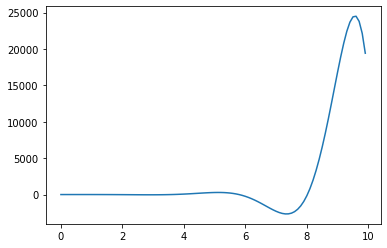

In [31]:
def monsysteme(x, w):
    y,z =w
    return [z,-3*y+2*z]

#y(0)=2 , z(0)=y'(0)=3

sol2 = solve_ivp(monsysteme, [0, 10], [2,3], t_eval=np.arange(0, 10, 0.1))

#x = np.arange(0,10,.1)
#w = sol2.sol(x)

#sol1 = solve_ivp(exponential_decay, [0, 10], [2], t_eval=np.arange(0, 10, 0.1))

plt.plot(sol2.t,sol2.y[0])


#plt.plot(x, w.T) # w.T est la transposée, l'opération est nécessaire pour avoir les valeurs présentées correctement
#plt.xlabel('x')
#plt.legend(['y', 'z=dy/dx'], shadow=True)
#plt.title('Ma solution, et sa dérivée')
plt.show()

Notez que ce qui nous intéresse principalement, c'est le graphe de $y$ et non celui de sa dérivée...

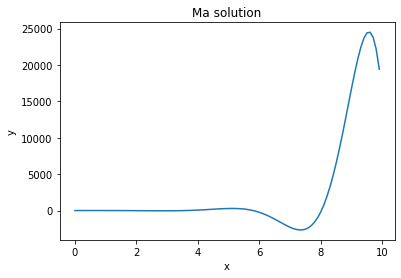

In [30]:
plt.plot(x, w[0]) # Ici on va plutôt aller chercher la première rangée de w, celle contenant les valeurs de y
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ma solution')
plt.show()

## Exercice 3.  Résolvez numériquement les équations différentielles suivantes.  Tracez la solution sur l'intervalle indiqué.

a) $\frac{d^2y}{dx^2}+2\frac{dy}{dx}-y=x$, $y(0)=1$, $y'(0)=2$, $0\leq x\leq 2$

b) $\frac{d^2y}{dx^2}+x\frac{dy}{dx}=0$, $y(0)=7$, $y'(0)=5$, $0\leq x\leq 5$

c) $\frac{d^2y}{dx^2}+x\frac{dy}{dx}-y=x$,  $y(0)=2$, $y'(0)=1$, $0\leq x\leq 5$

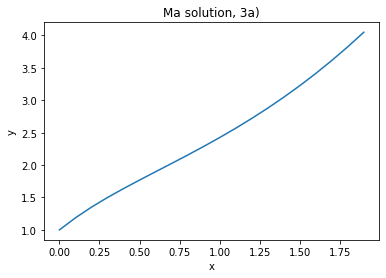

In [31]:
def equation_a(x, w):
    y,z =w
    return [z,-2*z+y+x]

sola = solve_ivp(equation_a, [0, 2], [1,2], dense_output=True)

x = np.arange(0,2,.1)
w = sola.sol(x)

plt.plot(x, w[0]) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ma solution, 3a)')
plt.show()

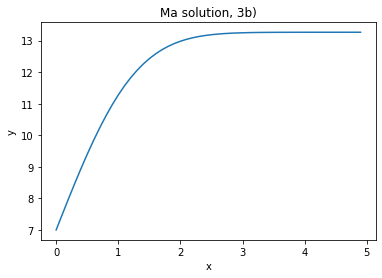

In [32]:
def equation_b(x, w):
    y,z =w
    return [z,-x*z]

solb = solve_ivp(equation_b, [0, 5], [7,5], dense_output=True)

x = np.arange(0,5,.1)
w = solb.sol(x)

plt.plot(x, w[0]) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ma solution, 3b)')
plt.show()

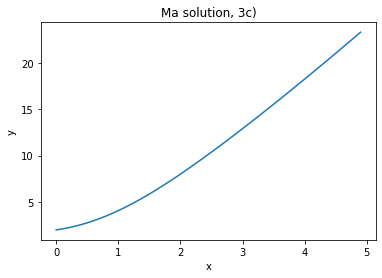

In [33]:
def equation_c(x, w):
    y,z =w
    return [z,-x*z+y+x]

solc = solve_ivp(equation_c, [0, 5], [2,1], dense_output=True)

x = np.arange(0,5,.1)
w = solc.sol(x)

plt.plot(x, w[0]) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ma solution, 3c)')
plt.show()